# Две переменные

Метод анализа главных компонент (PCA) — это статистический метод, используемый для снижения размерности данных при сохранении максимальной информации.

Пускай у нас есть данные по знаниям R и статистики

In [ ]:
# импортируем нужные библиотеки
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Создаем данные
data = {
    "R": [94, 98, 100, 100, 109, 105, 122, 104, 100, 97, 113, 108, 108, 78, 109, 102, 94],
    "Stat": [89, 103, 110, 109, 114, 111, 124, 107, 98, 89, 122, 117, 103, 78, 126, 108, 94]
}

# Создаем DataFrame
df = pd.DataFrame(data)

# Добавляем индексы, начиная с 1
df.index = range(1, len(df) + 1)

# Выводим DataFrame
print(df)


      R  Stat
1    94    89
2    98   103
3   100   110
4   100   109
5   109   114
6   105   111
7   122   124
8   104   107
9   100    98
10   97    89
11  113   122
12  108   117
13  108   103
14   78    78
15  109   126
16  102   108
17   94    94


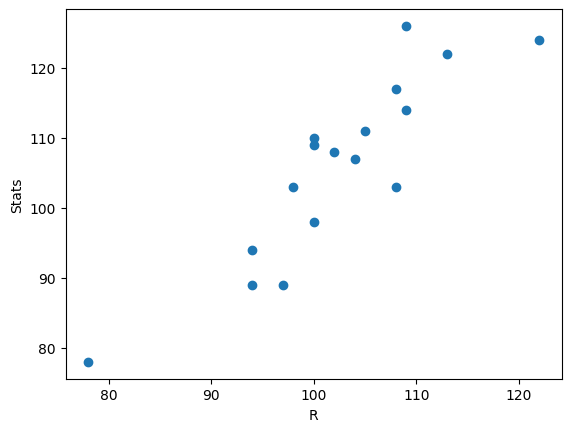

In [ ]:
#отобразим зависимость
plt.scatter(x=df['R'], y=df['Stat'])
plt.xlabel('R')
plt.ylabel('Stats')
plt.show()

Смысл того что будет происходить дальше

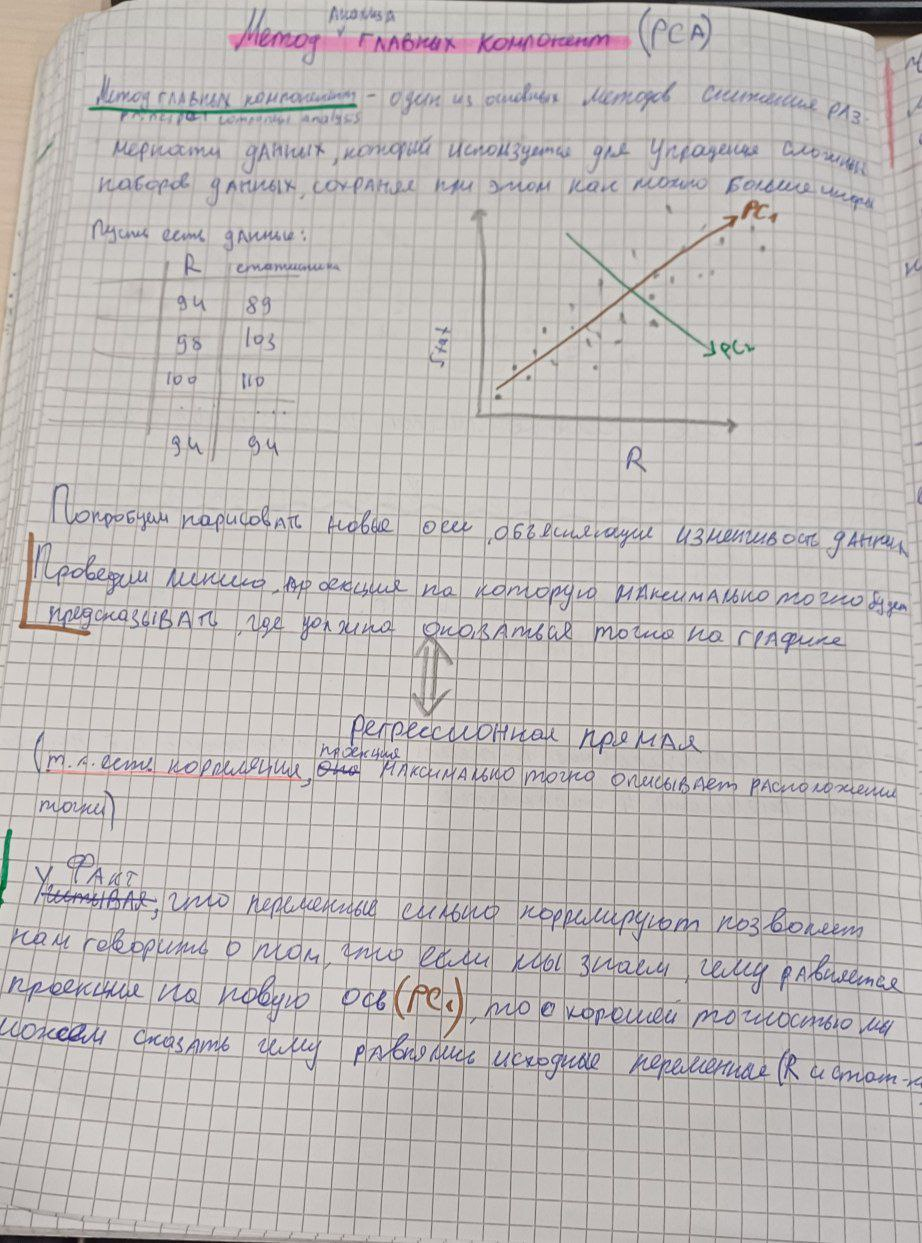

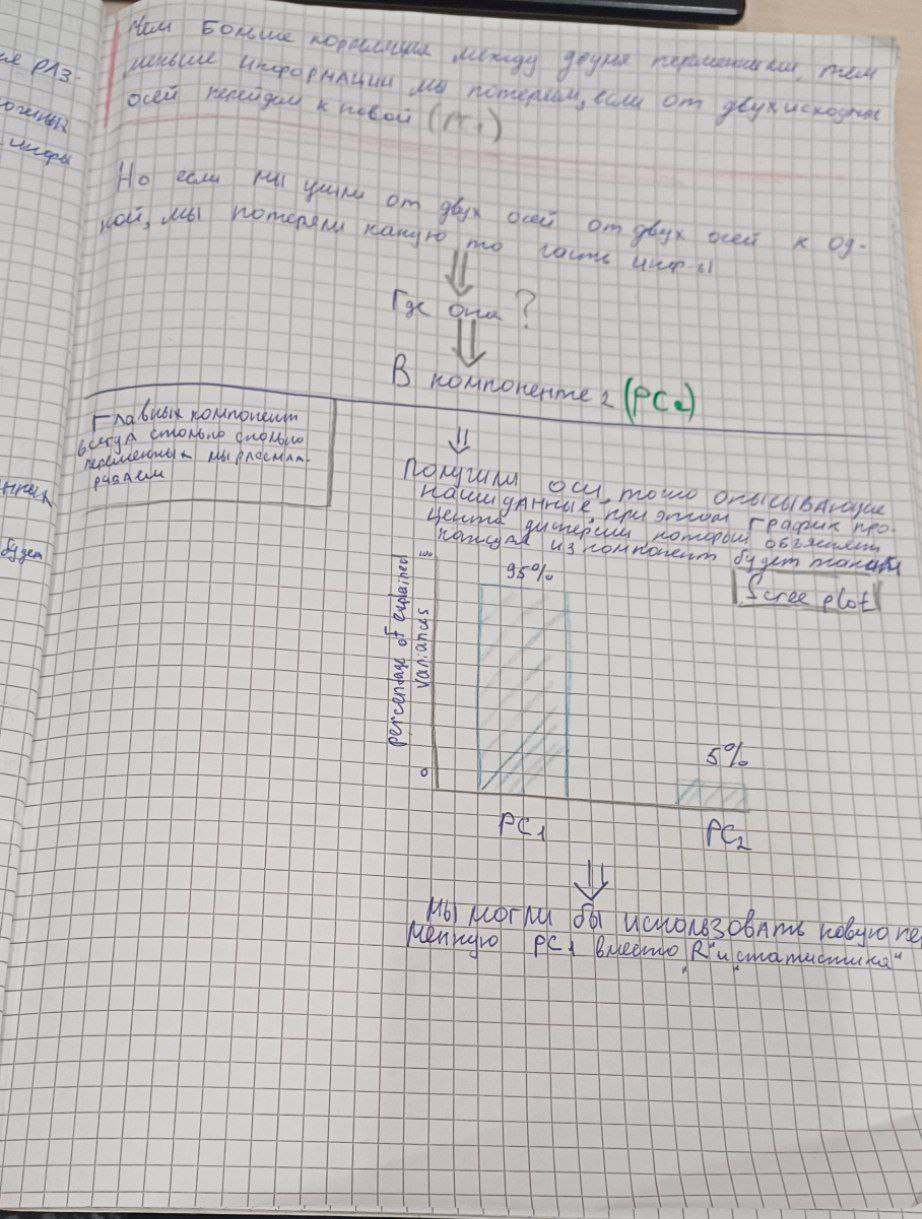

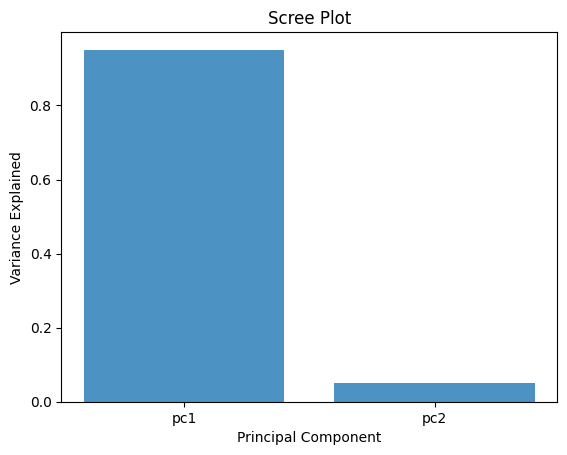

In [ ]:
#созадим такой график (scree plot)
# Применяем PCA
pca = PCA()
principalComponents = pca.fit_transform(df)
plt.bar(x=['pc1', 'pc2'], height=pca.explained_variance_ratio_, alpha=0.8)
#plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()


In [ ]:
print("Доля объясненной дисперсии каждой компоненты:")
print(pca.explained_variance_ratio_)

Доля объясненной дисперсии каждой компоненты:
[0.95061584 0.04938416]


Заметим, что первая компонента ( как и на рисунке выше объясняет 95% дисперсии данных)

Можно сделать вывод о том, что можем взять вместо этих двух переменных первую компоеннту сохранив 95% информации

Отобразим график biplot в осях компонент

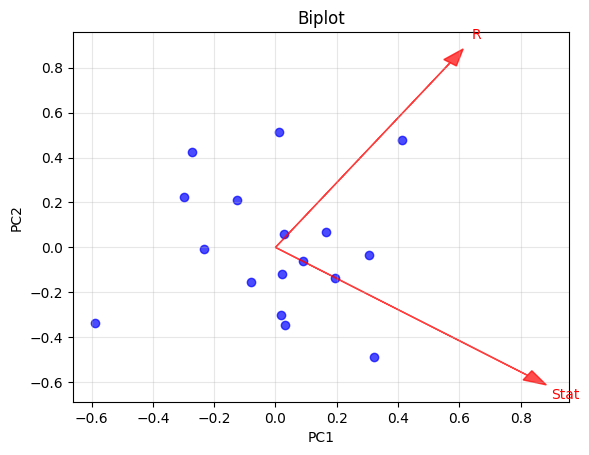

In [ ]:
#напишем функцию
def biplot(pca_result, components, feature_names=None, obs_names=None, scale_arrows=1.0, alpha=0.7, color_obs='blue', color_var='red'):
    """
    Построение биплота для визуализации PCA.

    Параметры:
    ----------
    pca_result : numpy array, shape (n_samples, 2)
        Результат PCA (проекции данных на две главные компоненты).
    components : numpy array, shape (n_features, 2)
        Веса переменных для двух главных компонент (pca.components_.T).
    feature_names : list of str, optional
        Названия переменных (столбцов исходных данных).
    obs_names : list of str, optional
        Названия наблюдений (строк исходных данных).
    scale_arrows : float, optional
        Масштабирование длины стрелок переменных.
    alpha : float, optional
        Прозрачность точек и стрелок.
    color_obs : str, optional
        Цвет точек наблюдений.
    color_var : str, optional
        Цвет стрелок переменных.
    """
    # Масштабирование данных для лучшей визуализации
    xs = pca_result[:, 0]  # Первая главная компонента (PC1)
    ys = pca_result[:, 1]  # Вторая главная компонента (PC2)
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    xs_scaled = xs * scalex
    ys_scaled = ys * scaley

    # Визуализация наблюдений (точек)
    plt.scatter(xs_scaled, ys_scaled, c=color_obs, alpha=alpha)

    # Добавление подписей наблюдений (если указаны)
    if obs_names is not None:
        for i, name in enumerate(obs_names):
            plt.text(xs_scaled[i], ys_scaled[i], name, fontsize=8, ha='center', va='bottom')

    # Визуализация переменных (стрелок)
    for i in range(components.shape[0]):
        plt.arrow(0, 0, components[i, 0] * scale_arrows, components[i, 1] * scale_arrows,
                  color=color_var, alpha=alpha, head_width=0.05)
        if feature_names is None:
            plt.text(components[i, 0] * scale_arrows * 1.15, components[i, 1] * scale_arrows * 1.15,
                     f"Var{i+1}", color=color_var, ha='center', va='center')
        else:
            plt.text(components[i, 0] * scale_arrows * 1.15, components[i, 1] * scale_arrows * 1.15,
                     feature_names[i], color=color_var, ha='center', va='center')

    # Настройка графика
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(alpha=0.3)
    plt.title("Biplot")
    plt.show()


biplot(principalComponents, pca.components_.T, feature_names=['R', 'Stat']) # транспонировали чтобы передать координаты переменных в размерности компонент


# Несколько переменных

Выгрузим информацию о фертильности и социально-экономических показателях в 47 франкоязычных провинциях Швейцарии в 1888 году.

Если что фертильность -это демографический показатель, который отражает способность населения к воспроизводству.

Здесь фертильность измеряет среднее количество детей, рожденных одной женщиной в течение её жизни, в определённой популяции (в данном случае — в 47 франкоязычных провинциях Швейцарии в 1888 году).

Fertility — общий коэффициент фертильности (среднее количество детей на женщину).

Agriculture — процент мужчин, занятых в сельском хозяйстве.

Examination — процент призывников, получивших высшие оценки на армейском экзамене.

Education — процент населения с образованием выше начального.

Catholic — процент католиков.

Infant.Mortality — коэффициент младенческой смертности (количество смертей на 1000 рождений).

In [ ]:


# URL датасета swiss в формате CSV
url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/swiss.csv"

# Загрузка данных
swiss = pd.read_csv(url)



print(swiss)

        rownames  Fertility  Agriculture  Examination  Education  Catholic  \
0     Courtelary       80.2         17.0           15         12      9.96   
1       Delemont       83.1         45.1            6          9     84.84   
2   Franches-Mnt       92.5         39.7            5          5     93.40   
3        Moutier       85.8         36.5           12          7     33.77   
4     Neuveville       76.9         43.5           17         15      5.16   
5     Porrentruy       76.1         35.3            9          7     90.57   
6          Broye       83.8         70.2           16          7     92.85   
7          Glane       92.4         67.8           14          8     97.16   
8        Gruyere       82.4         53.3           12          7     97.67   
9         Sarine       82.9         45.2           16         13     91.38   
10       Veveyse       87.1         64.5           14          6     98.61   
11         Aigle       64.1         62.0           21         12

Построим график, отражающий процент объясненной дисперссии (scree plot)

[0.74602841 0.18117521 0.05640546 0.0087935  0.00519374 0.00240369]


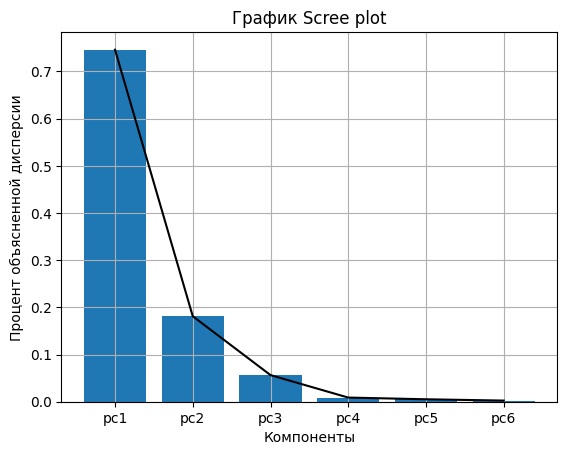

In [ ]:
pca = PCA(n_components=6)
pca_results = pca.fit_transform(swiss.iloc[:, 1:])
# получим объясненную дисперсию каждой перемнной
explained_var = pca.explained_variance_ratio_
print(explained_var)
plt.bar(x=[f'pc{i}' for i in range(1,7)], height=explained_var)
plt.plot([f'pc{i}' for i in range(1,7)], explained_var, c='black')
plt.title('График Scree plot')
plt.xlabel('Компоненты')
plt.ylabel('Процент объясненной дисперсии')
plt.grid()
plt.show()


Заметим, что первые 2 компоненты объясняют 92 % изменичвости исходных данных

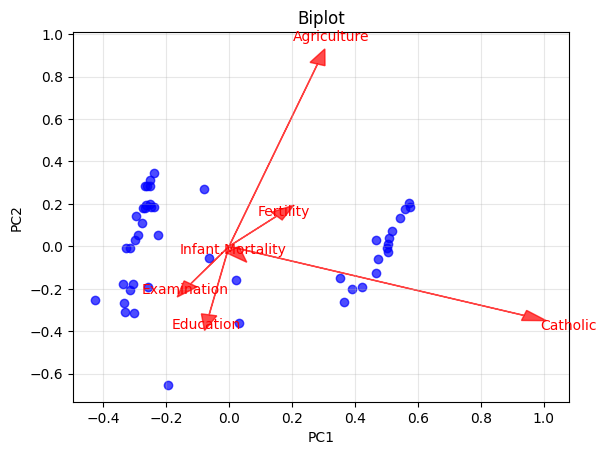

In [ ]:
biplot(pca_results,pca.components_.T, feature_names=['Fertility' , 'Agriculture', 'Examination',  'Education',  'Catholic', 'Infant.Mortality'])

ВАЖНО !!!  Сонаправленные векторы с осями имеют большее влияние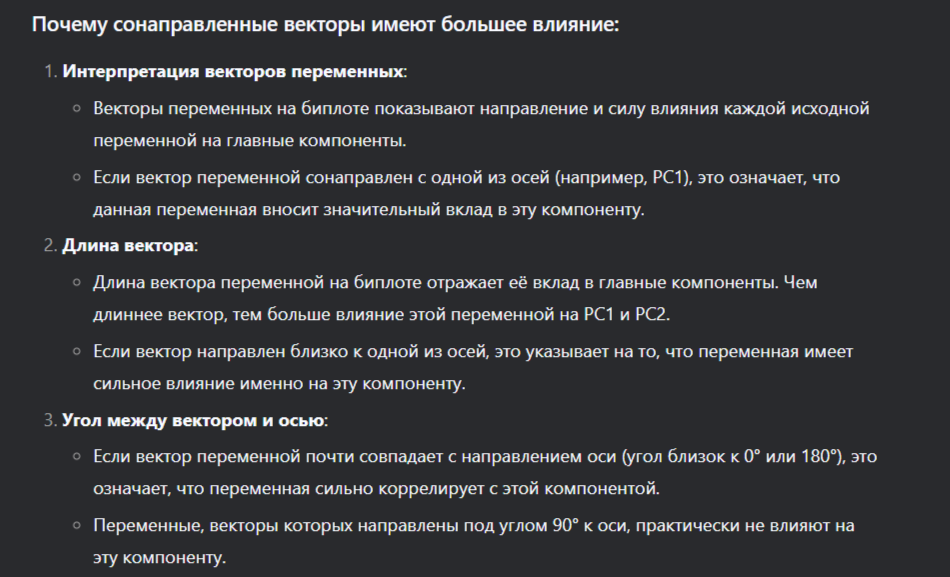

Заметим, что
catholic и fertility коррелируют



catholic и Infant.Mortality коррелируют

Agriculture и Education очень отрицательно коррелируют и тд

Из 6 компонент (6-ми мерного пространства) нам достаточно взять первые 2 и мы получим примерно 92% обяснения изменчивости данных

*для оптимального определения кол-ва компонент можно также воспользоваться методом локтя

Нам надо определиться что отражают эти компоненты. Для этого обратимся к матрице нагрузок каждой  переменной на компоненту

Заметим, что для первой компоненты определяющее значение имела переменная "Catholic" (процент католиков)

Теперь благодаря тому, что мы имеем две переменные , мы можем отобразить наши провинции в двумерном пространсте и провести кластерный анализ, который легко визуализировать

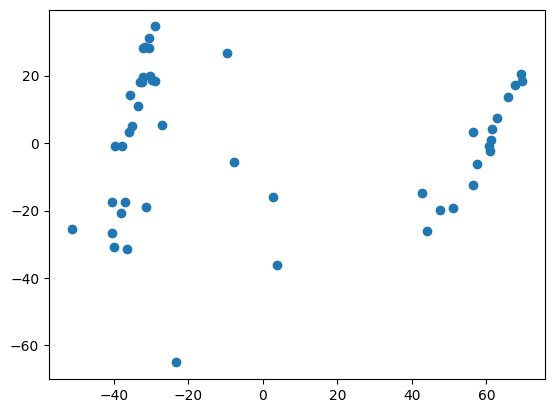

In [ ]:
# создадим новый датафрейм
prom_df = pd.DataFrame(pca_results[:, :2]).reset_index().rename(columns={'index': 'city', 0:'pc1', 1: 'pc2'})
prom_df['city'] = swiss['rownames']
# посмотрим предварительно на зависимость провинций от компонент
plt.figure()
plt.scatter(x='pc1', y='pc2', data=prom_df)
plt.show()

Посмотрим на сколько кластеров оптимальнее всего разделить данные

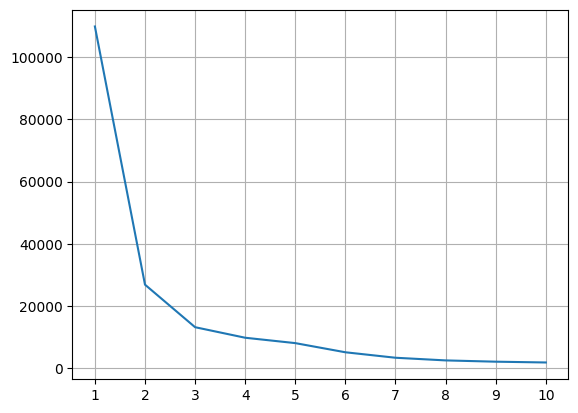

In [ ]:
# посмоттрим как менятся сумма квадратов расстояний в зависимости от кол-ва кластеров
from sklearn.cluster import KMeans
!pip install kneed
import kneed
k_range  = range(1, 11)
sp_of_sse = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(prom_df.iloc[: , 1:])
    sp_of_sse.append(kmeans.inertia_)
plt.figure()
plt.plot(k_range, sp_of_sse)
plt.grid()
plt.xticks(k_range)
plt.show()


Заметим, что точка наибольшего перегиба это 2 или 3. Но уточним методотм локтя

In [ ]:

knee_locator = kneed.KneeLocator(x=k_range, y=sp_of_sse,curve='convex', direction='decreasing')
optimal_k = knee_locator.elbow
print(f"Оптимальное число кластеров: {optimal_k}")

Оптимальное число кластеров: 3


Значит, будем искать три кластера

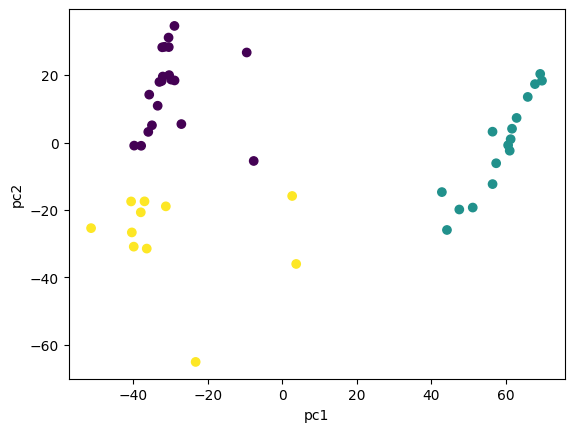

In [ ]:
kmeans_bew = KMeans(n_clusters=3, random_state=0)
kmeans_bew.fit(prom_df.iloc[: , 1:])

plt.scatter(x='pc1', y='pc2', data=prom_df, c=kmeans_bew.labels_)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()



Заметим, что кластризация работает нормально и добавим метки в датафрейм

In [ ]:
prom_df['cluster'] = kmeans_bew.labels_
print(prom_df)

            city        pc1        pc2  cluster
0     Courtelary -37.032433 -17.434879        2
1       Delemont  42.797334 -14.687668        1
2   Franches-Mnt  51.081639 -19.274036        1
3        Moutier  -7.716707  -5.458722        0
4     Neuveville -35.032658   5.126097        0
5     Porrentruy  44.161953 -25.922412        1
6          Broye  56.392984   3.225506        1
7          Glane  61.258244   0.999892        1
8        Gruyere  56.405711 -12.315979        1
9         Sarine  47.477237 -19.850911        1
10       Veveyse  61.008008  -2.412317        1
11         Aigle -28.965873  18.421967        0
12       Aubonne -31.653458  28.393112        0
13      Avenches -32.123633  19.581940        0
14      Cossonay -32.274690  28.254635        0
15     Echallens  -9.595877  26.711811        0
16      Grandson -39.800148  -0.905332        0
17      Lausanne -40.435132 -26.646468        2
18     La Vallee -51.376323 -25.376019        2
19        Lavaux -30.572130  31.132920  